In [224]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import seaborn as sns
import os
from glob import iglob
from sklearn.metrics import auc

In [225]:
def plot_roc(fpr,tpr,ax,c='black'):
    rocauc = auc(fpr,tpr)
    plot_roc.sum_rocauc += rocauc
    ax.plot(fpr,tpr,linewidth=1,alpha=0.5,color=c)
    return rocauc
plot_roc.sum_rocauc = 0

In [226]:
def plot_pr(prec,rec,ax,c='black'):
    prec = np.maximum.accumulate(prec)
    prauc = auc(rec,prec)
    plot_pr.sum_prauc += prauc
    ax.plot(rec,prec,linewidth=1,alpha=0.5,color=c)
    return prauc
plot_pr.sum_prauc = 0

Number of proteins:  460
Mean ROC AUC:       0.81
Mean PR  AUC:       0.49

Number of proteins:  456
Mean ROC AUC:       0.73
Mean PR  AUC:       0.43

Number of proteins:  439
Mean ROC AUC:       0.71
Mean PR  AUC:       0.51

Number of proteins:  293
Mean ROC AUC:       0.71
Mean PR  AUC:       0.41


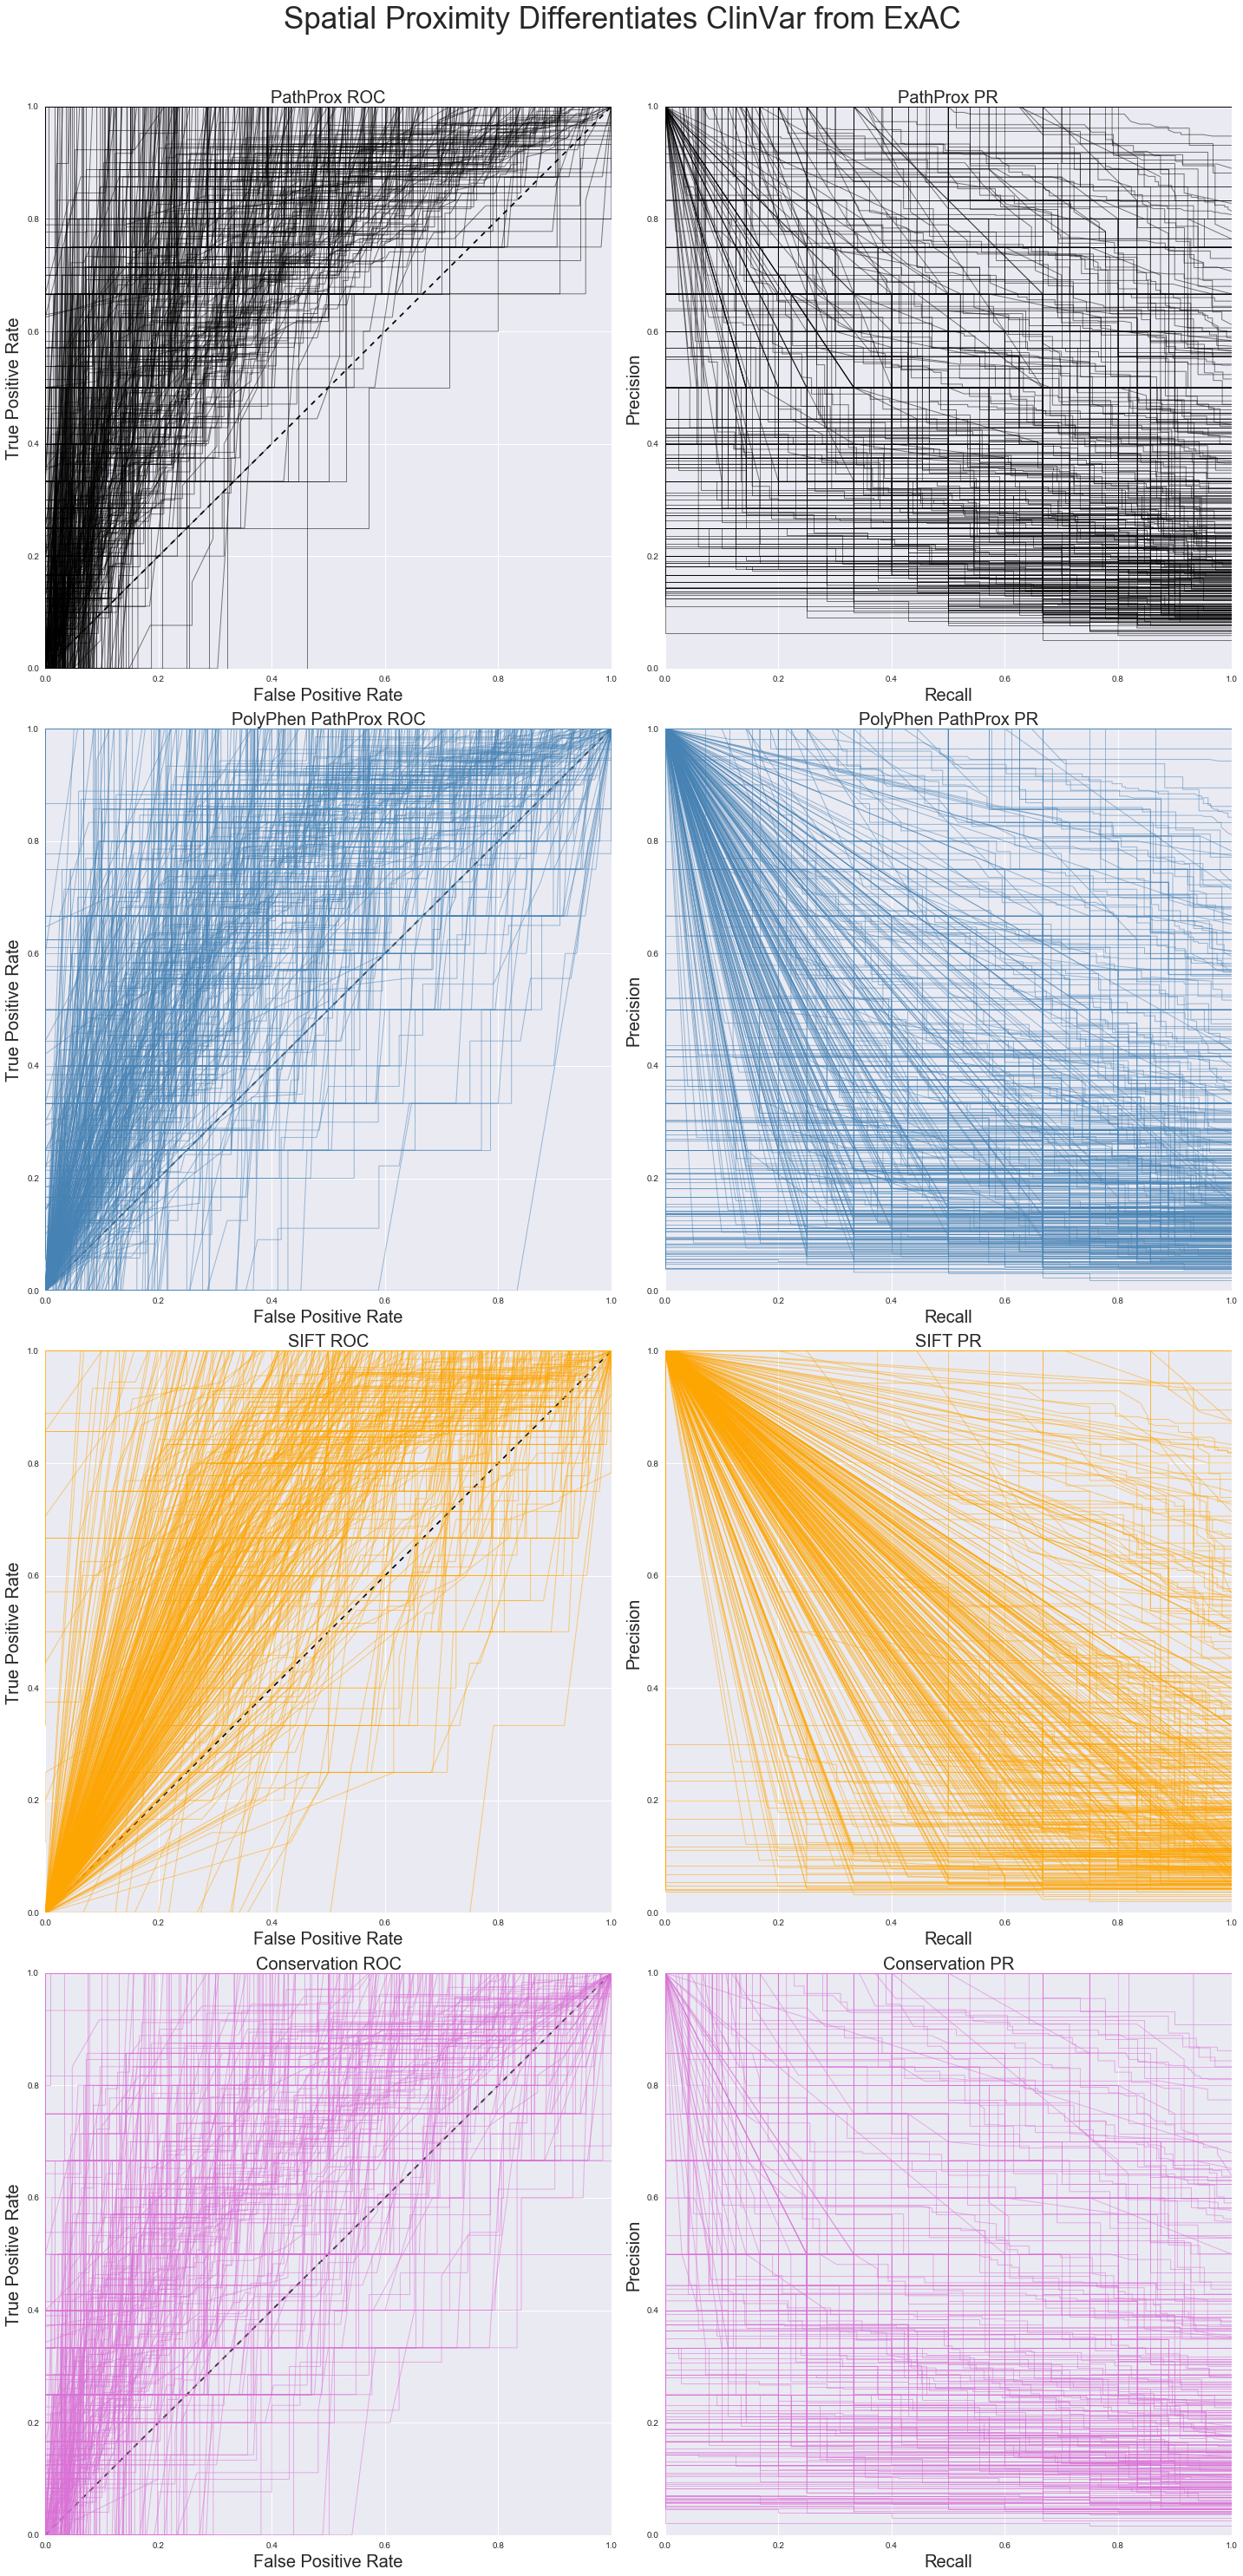

In [227]:
colo_roc,colo_pr = [],[]
pph2_roc,pph2_pr = [],[]
sift_roc,sift_pr = [],[]
cons_roc,cons_pr = [],[]

def set_limits(ax):
    ax.set_xlim([0.,1.])
    ax.set_ylim([0.,1.])
def plot_diag(ax):
    ax.plot([0,1],[0,1],'k--')
def set_labels(ax):
    ax[0].set_xlabel("False Positive Rate",fontsize=20)
    ax[0].set_ylabel("True Positive Rate",fontsize=20)
    ax[1].set_xlabel("Recall",fontsize=20)
    ax[1].set_ylabel("Precision",fontsize=20)
plot_roc.sum_rocauc = 0
plot_pr.sum_prauc   = 0
fig,ax = plt.subplots(4,2,figsize=(20,40))
plt.suptitle("Spatial Proximity Differentiates ClinVar from ExAC",fontsize=35,y=1.03)
for i in range(4):
    plot_diag(ax[i][0])
for i,j in [(i,j) for i in range(4) for j in range(2)]:
    set_limits(ax[i][j])
for i in range(4):
    set_labels(ax[i])

# Plot the Colocalization ROC and PR curves
ax[0][0].set_title("PathProx ROC",fontsize=20)
ax[0][1].set_title("PathProx PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_roc*.txt.gz"):
    i+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
    rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[0][0])
    colo_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_pr*.txt.gz"):
    j+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
    prauc = plot_pr(df["prec"],df["rec"],ax=ax[0][1])
    colo_pr.append(prauc)
print "Number of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))
plot_roc.sum_rocauc,plot_pr.sum_prauc = 0,0

# Plot the PolyPhen2 ROC and PR curves
ax[1][0].set_title("PolyPhen PathProx ROC",fontsize=20)
ax[1][1].set_title("PolyPhen PathProx PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_polyphen_roc*.txt.gz"):
    i+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
    rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[1][0],c="steelblue")
    pph2_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_polyphen_pr*.txt.gz"):
    j+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
    prauc = plot_pr(df["prec"],df["rec"],ax=ax[1][1],c="steelblue")
    pph2_pr.append(prauc)    
print "\nNumber of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))
plot_roc.sum_rocauc,plot_pr.sum_prauc = 0,0

# Plot the SIFT ROC and PR curves
ax[2][0].set_title("SIFT ROC",fontsize=20)
ax[2][1].set_title("SIFT PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_sift_roc*.txt.gz"):
    i+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
    rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[2][0],c="orange")
    sift_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_sift_pr*.txt.gz"):
    j+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
    prauc = plot_pr(df["prec"],df["rec"],ax=ax[2][1],c="orange")
    sift_pr.append(prauc)
print "\nNumber of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))
plot_roc.sum_rocauc,plot_pr.sum_prauc = 0,0

# Plot the Conservation ROC and PR curves
ax[3][0].set_title("Conservation ROC",fontsize=20)
ax[3][1].set_title("Conservation PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_conservation_roc*.txt.gz"):
    i+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
    rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[3][0],c="orchid")
    cons_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_2016-08-24/*clinvar-exac_conservation_pr*.txt.gz"):
    j+=1
    df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
    prauc = plot_pr(df["prec"],df["rec"],ax=ax[3][1],c="orchid")
    cons_pr.append(prauc)
print "\nNumber of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))


plt.tight_layout()
plt.show()

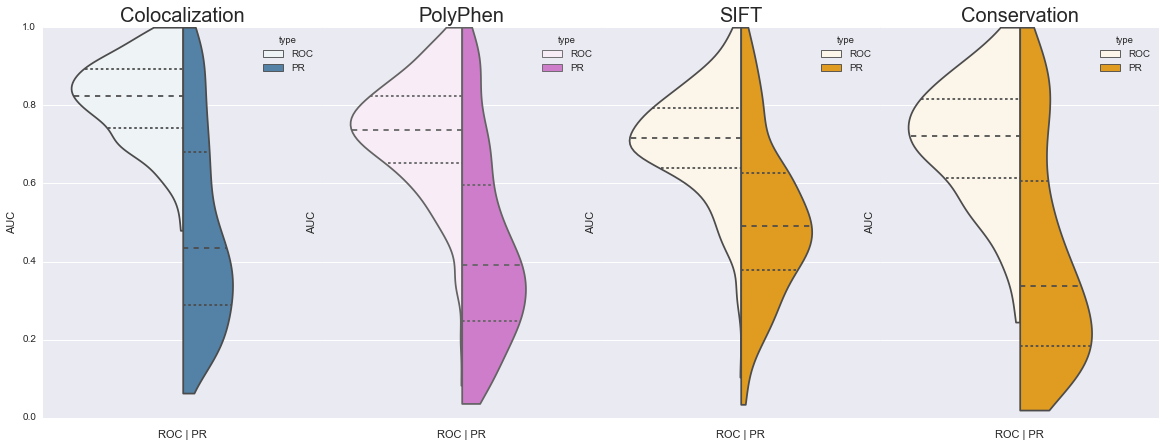

In [228]:
import seaborn as sns
fig,ax = plt.subplots(1,4,figsize=(20,7),sharey=True)
df = pd.DataFrame({"ROC | PR":"","AUC":colo_roc+colo_pr,"type":["ROC"]*len(colo_roc)+["PR"]*len(colo_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[0],orient='vertical',inner='quart',cut=0,color="steelblue")
ax[0].set_title("Colocalization",fontsize=20)
df = pd.DataFrame({"ROC | PR":"","AUC":pph2_roc+pph2_pr,"type":["ROC"]*len(pph2_roc)+["PR"]*len(pph2_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[1],orient='vertical',inner='quart',cut=0,color="orchid")
ax[1].set_title("PolyPhen",fontsize=20)
df = pd.DataFrame({"ROC | PR":"","AUC":sift_roc+sift_pr,"type":["ROC"]*len(sift_roc)+["PR"]*len(sift_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[2],orient='vertical',inner='quart',cut=0,color="orange")
ax[2].set_title("SIFT",fontsize=20)
df = pd.DataFrame({"ROC | PR":"","AUC":cons_roc+cons_pr,"type":["ROC"]*len(cons_roc)+["PR"]*len(cons_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[3],orient='vertical',inner='quart',cut=0,color="orange")
ax[3].set_title("Conservation",fontsize=20)
fig.subplots_adjust(hspace=0,wspace=0)
plt.show()

In [229]:
sigSeg = [["4DB1","A"],["2L4R","A"],["3GRO","A"],["2WPL","S"],["4FNW","A"],["3BIC","B"],["2GJX","G"],["4MLE","A"],["1WSV","A"],["3LUE","F"],["1G88","A"],["3RUK","C"],["2COY","A"],["2YOB","A"],["3DZY","D"],["2W86","A"],["2WWM","D"],["3U1K","D"],["3QFC","A"],["3N5N","X"],["3EQ1","B"],
["3EPZ","B"],["2UXW","A"],["3LXC","A"],["4BKT","I"],["1C9Y","A"],["3F5N","D"],["1RY7","B"],["2A1X","A"],["3PUF","A"],["2K27","A"],["3W1W","A"],["4KIT","C"],["3EE6","A"],["3EVS","B"],["1D5R","A"],["2FGI","A"],["4CDG","B"],["2DMB","A"],["1P49","A"],["3FBY","A"],
["2RD0","A"],["4AW6","E"],["3CXL","A"],["1NF1","A"],["4BGQ","A"],["3W82","B"],["2K60","A"],["3P0L","A"],["2M6I","A"],["3GHG","C"],["1XDV","B"],["2H5G","B"],["1YVL","A"],["2WTK","C"],["2Y1M","F"],["3II5","A"],["1K93","F"],["1BRP","A"],["4ELJ","A"],
["2OKN","A"],["3CON","A"],["3LBX","B"],["1FG9","C"],["4CH9","B"],["3LCO","A"],["1OWA","A"],["2R0O","B"],["2RMN","A"],["3N1P","B"],["2KKW","A"],["2FY5","A"],["3K71","D"],["2VR2","A"],["2E9W","D"],["1L5S","A"],["1NQ0","A"],["3BG3","A"],
["2SHP","B"],["4F91","B"],["1IIL","G"],["1NR1","C"],["4B7L","A"]]

Number of proteins:   83
Mean ROC AUC:       0.87
Mean PR  AUC:       0.64

Number of proteins:   82
Mean ROC AUC:       0.77
Mean PR  AUC:       0.52

Number of proteins:   79
Mean ROC AUC:       0.75
Mean PR  AUC:       0.58

Number of proteins:   53
Mean ROC AUC:       0.75
Mean PR  AUC:       0.49


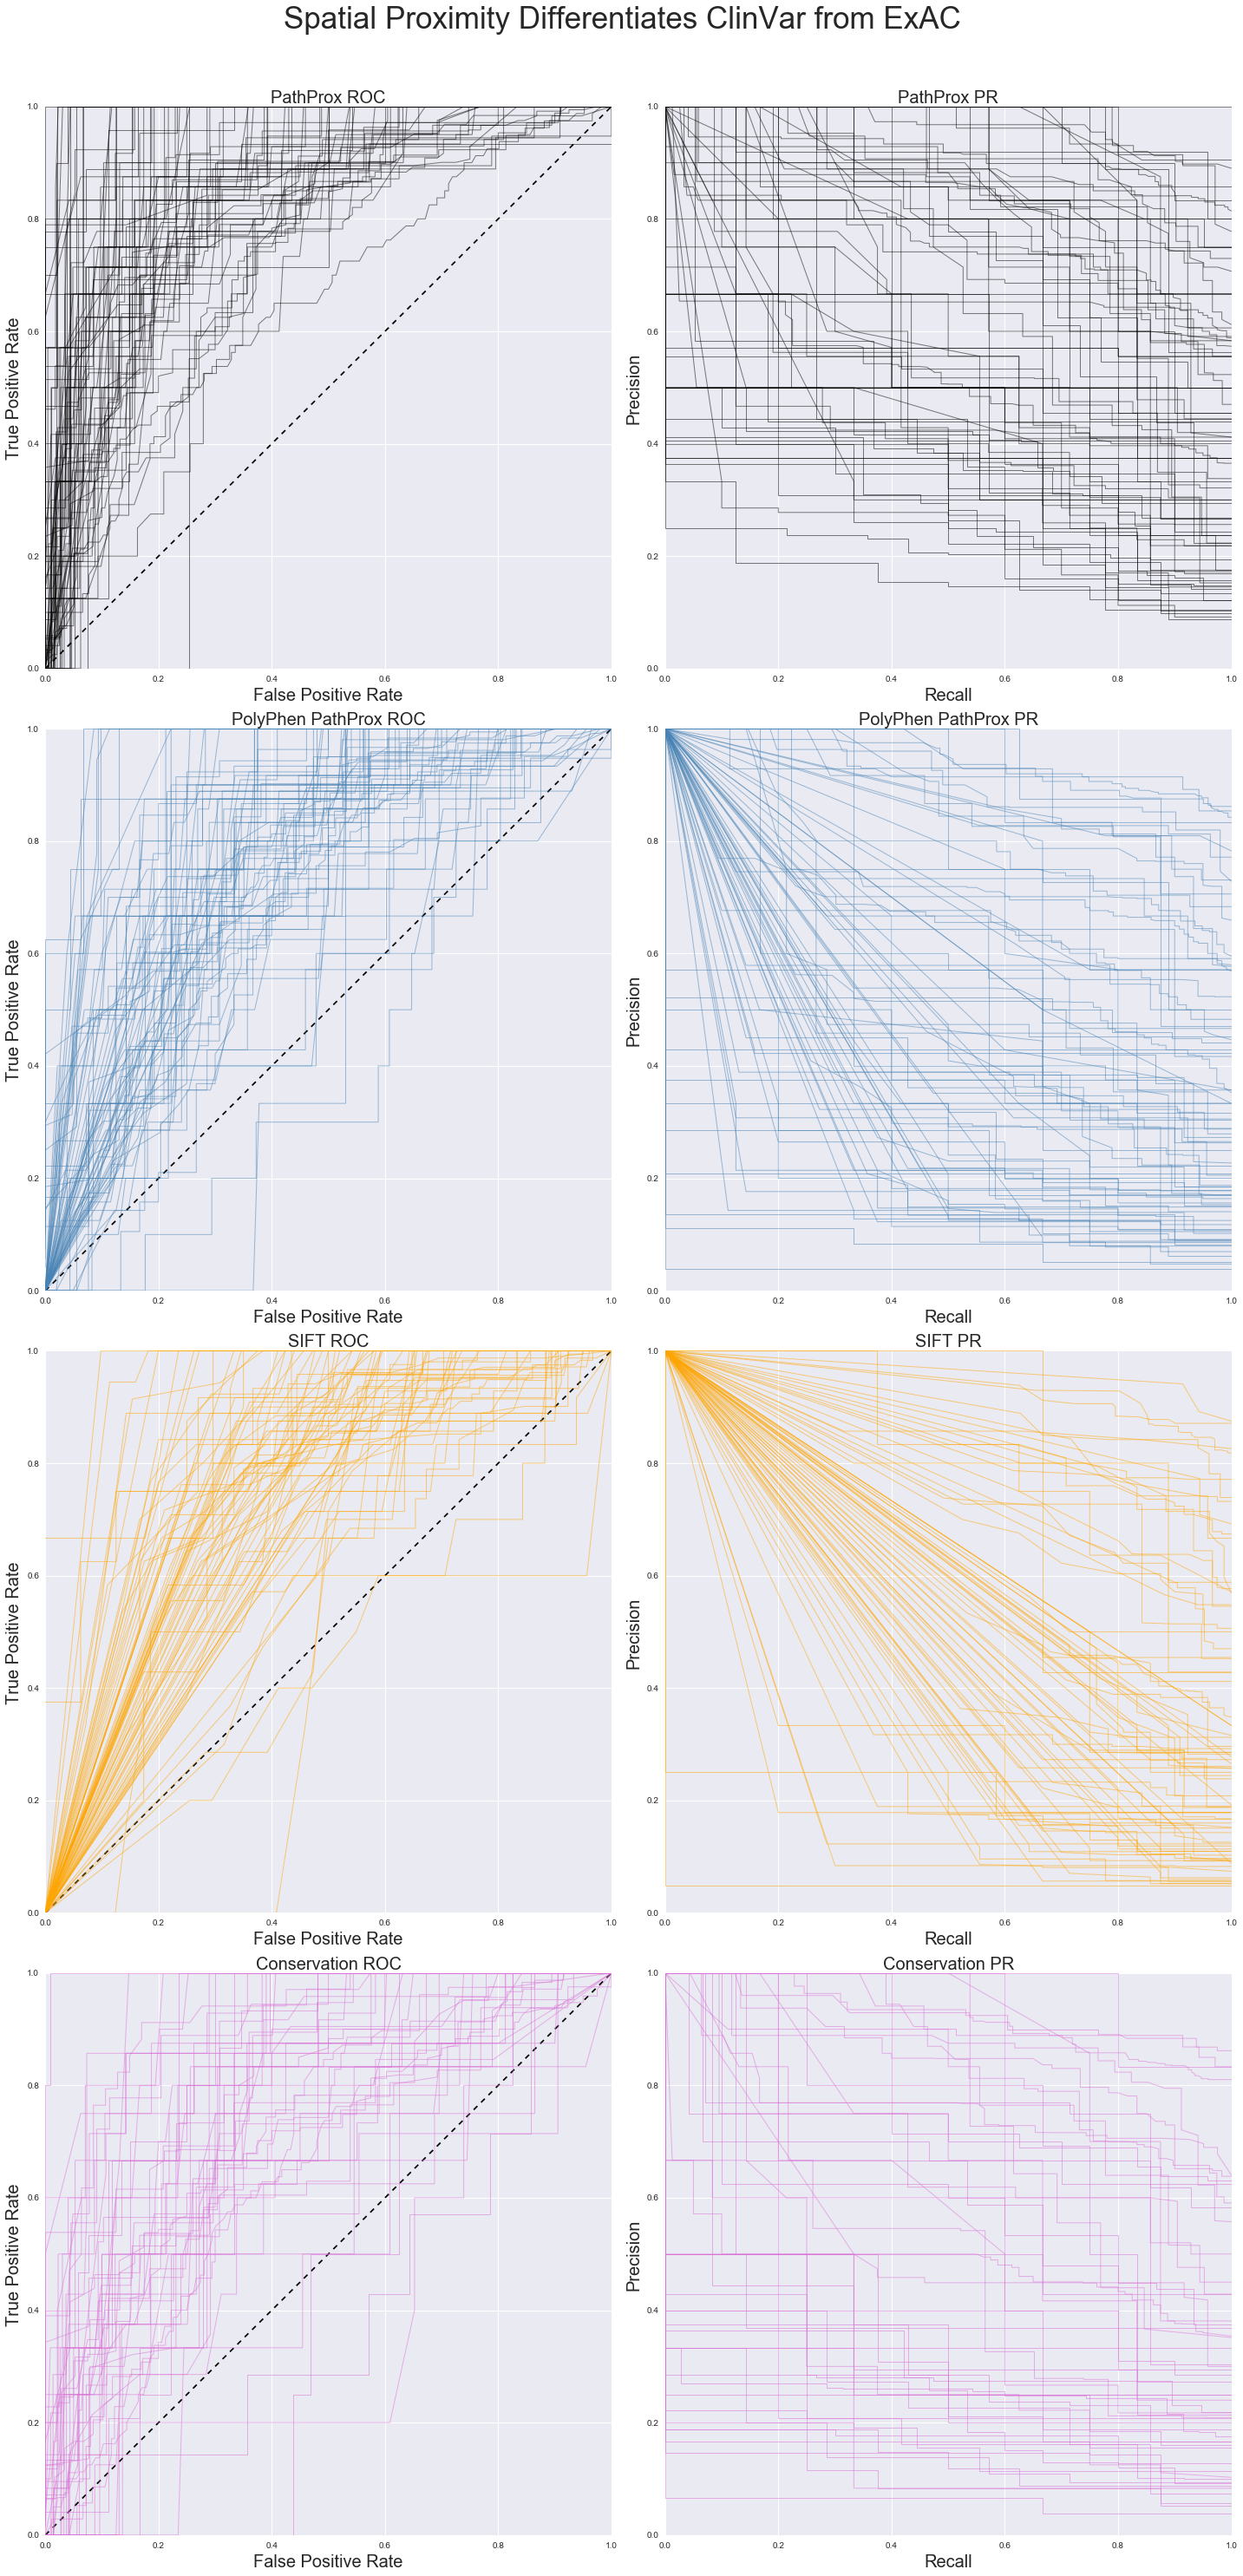

In [234]:
colo_roc,colo_pr = [],[]
pph2_roc,pph2_pr = [],[]
sift_roc,sift_pr = [],[]
cons_roc,cons_pr = [],[]

def set_limits(ax):
    ax.set_xlim([0.,1.])
    ax.set_ylim([0.,1.])
def plot_diag(ax):
    ax.plot([0,1],[0,1],'k--')
def set_labels(ax):
    ax[0].set_xlabel("False Positive Rate",fontsize=20)
    ax[0].set_ylabel("True Positive Rate",fontsize=20)
    ax[1].set_xlabel("Recall",fontsize=20)
    ax[1].set_ylabel("Precision",fontsize=20)
plot_roc.sum_rocauc = 0
plot_pr.sum_prauc   = 0
fig,ax = plt.subplots(4,2,figsize=(20,40))
plt.suptitle("Spatial Proximity Differentiates ClinVar from ExAC",fontsize=35,y=1.03)
for i in range(4):
    plot_diag(ax[i][0])
for i,j in [(i,j) for i in range(4) for j in range(2)]:
    set_limits(ax[i][j])
for i in range(4):
    set_labels(ax[i])

# Plot the Colocalization ROC and PR curves
ax[0][0].set_title("PathProx ROC",fontsize=20)
ax[0][1].set_title("PathProx PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08112016/*clinvar-exac_roc*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        i+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
        rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[0][0])
        colo_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08112016/*clinvar-exac_pr*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        j+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
        prauc = plot_pr(df["prec"],df["rec"],ax=ax[0][1])
        colo_pr.append(prauc)
print "Number of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))
plot_roc.sum_rocauc,plot_pr.sum_prauc = 0,0

# Plot the PolyPhen2 ROC and PR curves
ax[1][0].set_title("PolyPhen PathProx ROC",fontsize=20)
ax[1][1].set_title("PolyPhen PathProx PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08112016/*clinvar-exac_polyphen_roc*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        i+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
        rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[1][0],c="steelblue")
        pph2_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08112016/*clinvar-exac_polyphen_pr*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        j+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
        prauc = plot_pr(df["prec"],df["rec"],ax=ax[1][1],c="steelblue")
        pph2_pr.append(prauc)    
print "\nNumber of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))
plot_roc.sum_rocauc,plot_pr.sum_prauc = 0,0

# Plot the SIFT ROC and PR curves
ax[2][0].set_title("SIFT ROC",fontsize=20)
ax[2][1].set_title("SIFT PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08112016/*clinvar-exac_sift_roc*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        i+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
        rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[2][0],c="orange")
        sift_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08112016/*clinvar-exac_sift_pr*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        j+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
        prauc = plot_pr(df["prec"],df["rec"],ax=ax[2][1],c="orange")
        sift_pr.append(prauc)
print "\nNumber of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))
plot_roc.sum_rocauc,plot_pr.sum_prauc = 0,0

# Plot the Conservation ROC and PR curves
ax[3][0].set_title("Conservation ROC",fontsize=20)
ax[3][1].set_title("Conservation PR",fontsize=20)
i,j=0,0
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08122016/*clinvar-exac_conservation_roc*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        i+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["fpr","tpr"])
        rocauc = plot_roc(df["fpr"],df["tpr"],ax=ax[3][0],c="orchid")
        cons_roc.append(rocauc)
for f in iglob("/Volumes/doux/pdbmap/results/multiROC_08122016/*clinvar-exac_conservation_pr*.txt.gz"):
    if os.path.basename(f).split('_')[0].split('-') in sigSeg:
        j+=1
        df = pd.read_csv(f,sep='\t',header=None,names=["prec","rec"])
        prauc = plot_pr(df["prec"],df["rec"],ax=ax[3][1],c="orchid")
        cons_pr.append(prauc)
print "\nNumber of proteins:  %3d"%i
print "Mean ROC AUC:       %.2f"%(plot_roc.sum_rocauc/float(i))
print "Mean PR  AUC:       %.2f"%(plot_pr.sum_prauc/float(j))


plt.tight_layout()
plt.show()

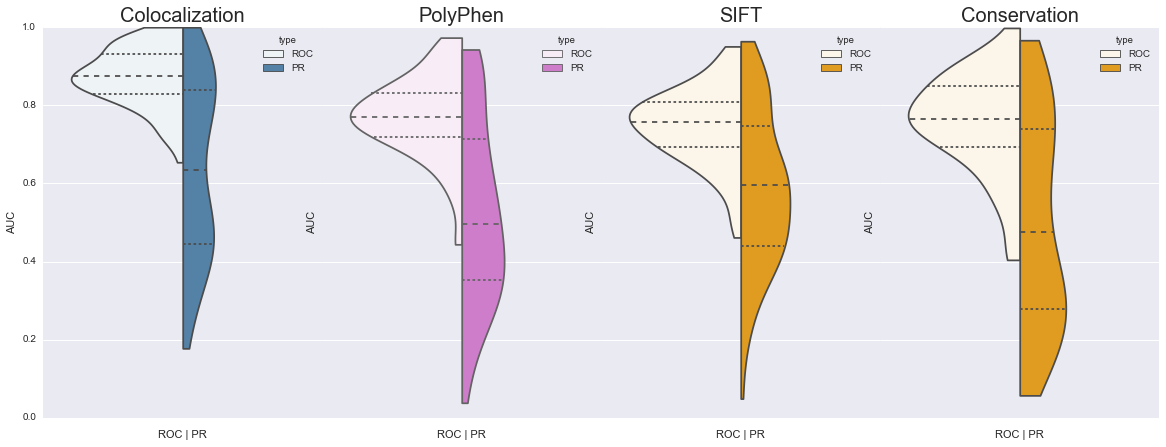

In [236]:
import seaborn as sns
fig,ax = plt.subplots(1,4,figsize=(20,7),sharey=True)
df = pd.DataFrame({"ROC | PR":"","AUC":colo_roc+colo_pr,"type":["ROC"]*len(colo_roc)+["PR"]*len(colo_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[0],orient='vertical',inner='quart',cut=0,color="steelblue")
ax[0].set_title("Colocalization",fontsize=20)
df = pd.DataFrame({"ROC | PR":"","AUC":pph2_roc+pph2_pr,"type":["ROC"]*len(pph2_roc)+["PR"]*len(pph2_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[1],orient='vertical',inner='quart',cut=0,color="orchid")
ax[1].set_title("PolyPhen",fontsize=20)
df = pd.DataFrame({"ROC | PR":"","AUC":sift_roc+sift_pr,"type":["ROC"]*len(sift_roc)+["PR"]*len(sift_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[2],orient='vertical',inner='quart',cut=0,color="orange")
ax[2].set_title("SIFT",fontsize=20)
df = pd.DataFrame({"ROC | PR":"","AUC":cons_roc+cons_pr,"type":["ROC"]*len(cons_roc)+["PR"]*len(cons_pr)})
sns.violinplot(x="ROC | PR",y="AUC",hue="type",data=df,split=True,ax=ax[3],orient='vertical',inner='quart',cut=0,color="orange")
ax[3].set_title("Conservation",fontsize=20)
fig.subplots_adjust(hspace=0,wspace=0)
plt.show()